In [34]:
from repositories import csvTRNSYS2
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from interactors import analysisTRNSYS2
from utils import transformation_EP_CO2
from sqlalchemy import create_engine

In [64]:
n_zones = 1
name = 'FE35_2'
n_viv = 1
refcat = '1701521DD7810B'
analysisType = analysisTRNSYS2.energyAnalysis(n_viv, name, refcat)
data = analysisTRNSYS2.do_analysis(analysisType)
P_ht, P_cl, P_lig, P_dev, P_dhw, PE_ht, PE_cl, PE_lig,PE_dev ,PE_dhw, CO2_ht, CO2_cl, CO2_lig, CO2_dev, CO2_dhw = data.start()

In [52]:
pd.DataFrame(PE_dhw['BC0_0'])

,Dwelling_1
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.012384
...,...
8755,0.000955
8756,0.012331
8757,0.012066
8758,0.000000


In [59]:
grado_ht = {'joule':0.35,'BC':0.28,'caldera_GN':0.15,'butano':0.15,'nada':0.07}
grado_cl = {'split':0.1,'BC':0.43,'multi_split':0.04,'nada':0.43}
grado_dhw ={'caldera_GN':0.64,'butano':0.1,'BC':0, 'joule':0.26}
pd.set_option('display.float_format', lambda x: '%.6f' % x)
coef_NRPE={'ele': 2.937, 'GN': 1.190, 'butano': 1.201}
EER = 2
COP=2 
COP_DHW=1.7
eta_cal=0.7

dhw = pd.concat([pd.DataFrame(P_dhw)[col].explode().reset_index(drop=True) for col in pd.DataFrame(P_dhw).columns], axis=1)
PE_dhw = pd.DataFrame(PE_dhw['BC0_0'])
BC0_0_PE_dhw = pd.DataFrame(PE_dhw['Dwelling_1'])

BC0_0_dhw['caldera'] = BC0_0_dhw['BC0_0'].apply(lambda value: value * (grado_dhw['caldera_GN'] / eta_cal * coef_NRPE['GN'])).astype(float)
BC0_0_dhw['butano'] = BC0_0_dhw['BC0_0'].apply(lambda value: value * (grado_dhw['butano'] / eta_cal * coef_NRPE['butano'])).astype(float)
BC0_0_dhw['BC'] = BC0_0_dhw['BC0_0'].apply(lambda value: value * (grado_dhw['BC'] / COP_DHW * coef_NRPE['ele'])).astype(float)
BC0_0_dhw['joule'] = BC0_0_dhw['BC0_0'].apply(lambda value: value * (grado_dhw['joule'] / 1 * coef_NRPE['ele'])).astype(float)
BC0_0_dhw['PE_dhw'] = BC0_0_dhw['caldera']+BC0_0_dhw['butano']+BC0_0_dhw['BC']+BC0_0_dhw['joule']
BC0_0_dhw['PE_dhw2']= BC0_0_dhw['BC0_0'].apply(lambda value: value *((grado_dhw['caldera_GN']/eta_cal*coef_NRPE['GN'])+(grado_dhw['butano']/eta_cal*coef_NRPE['butano'])+(grado_dhw['BC']/COP_DHW*coef_NRPE['ele'])+(grado_dhw['joule']/1 * coef_NRPE['ele'])))
BC0_0_dhw['PE_dhw3'] = PE_dhw['Dwelling_1']
#BC0_0_dhw['PE_dhw4'] = PE_dhw3['Dwelling_1']
BC0_0_dhw


,BC0_0,caldera,butano,BC,joule,PE_dhw,PE_dhw2,PE_dhw3
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.006097,0.006633,0.001046,0.000000,0.004656,0.012335,0.012335,0.012384
...,...,...,...,...,...,...,...,...
8755,0.000470,0.000511,0.000081,0.000000,0.000359,0.000951,0.000951,0.000955
8756,0.006071,0.006605,0.001042,0.000000,0.004636,0.012282,0.012282,0.012331
8757,0.005940,0.006463,0.001019,0.000000,0.004536,0.012018,0.012018,0.012066
8758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


,Dwelling_1
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.012384
...,...
8755,0.000955
8756,0.012331
8757,0.012066
8758,0.000000


In [54]:
BC0_0_dhw['PE_dhw3']

KeyError: 'PE_dhw3'

In [17]:
BC0_0_dhw['PE_dhw2'].sum()

32.50189499292806

In [18]:
BC0_0_dhw['PE_dhw3'].sum()

16.06466621691737

In [36]:
PE_ht = {}
PE_cl = {}
PE_lig = {}
PE_dev = {}
PE_dhw = {}

project = transformation_EP_CO2.pE_ARV_demand(grado_ht, grado_cl, grado_dhw)
for i in P_ht:
    output = transformation_EP_CO2.calculo(project, P_ht[i], P_cl[i], P_lig[i],P_dev[i],P_dhw[i])
    PE_ht_aux, PE_cl_aux, PE_lig_aux,PE_dev_aux ,PE_dhw_aux = output.start()
    PE_ht.setdefault(i, PE_ht_aux)
    PE_cl.setdefault(i, PE_cl_aux)
    PE_lig.setdefault(i, PE_lig_aux)
    PE_dev.setdefault(i,PE_dev_aux)
    PE_dhw.setdefault(i, PE_dhw_aux)

In [41]:
PE_dhw3 = pd.DataFrame(PE_dhw['BC0_0'])
PE_dhw3

,Dwelling_1
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.012384
...,...
8755,0.000955
8756,0.012331
8757,0.012066
8758,0.000000


In [44]:
typeStep = csvTRNSYS2.HourlyMulti()
output = csvTRNSYS2.readTRNSYS(typeStep, n_viv, name, refcat)
output_reader, P_ht, P_cl, P_lig, P_dev, P_dhw = output.start()


grado_ht = {'joule':0.35,'BC':0.28,'caldera_GN':0.15,'butano':0.15,'nada':0.07}
grado_cl = {'split':0.1,'BC':0.43,'multi_split':0.04,'nada':0.43}
grado_dhw ={'caldera_GN':0.64,'butano':0.1,'BC':0, 'joule':0.26}


PE_ht = {}
PE_cl = {}
PE_lig = {}
PE_dev = {}
PE_dhw = {}
     
# Instancia de la clase para pasar de demanda a consumo de energía primaria.
project = transformation_EP_CO2.pE_ARV_demand(grado_ht, grado_cl, grado_dhw)
for i in P_ht:
            
            # El método pE_ARV_demand que se encuentra dentro de la clase transformation_EP_CO2 se ejectura 1 vez por cada simulación leída
            
    output = transformation_EP_CO2.calculo(project, P_ht[i], P_cl[i], P_lig[i],P_dev[i],P_dhw[i])
    PE_ht_aux, PE_cl_aux, PE_lig_aux,PE_dev_aux ,PE_dhw_aux = output.start()
    PE_ht.setdefault(i, PE_ht_aux)
    PE_cl.setdefault(i, PE_cl_aux)
    PE_lig.setdefault(i, PE_lig_aux)
    PE_dev.setdefault(i,PE_dev_aux)
    PE_dhw.setdefault(i, PE_dhw_aux)

In [45]:
PE_dhw4 = pd.DataFrame(PE_dhw['BC0_0'])
PE_dhw4

,Dwelling_1
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.012384
...,...
8755,0.000955
8756,0.012331
8757,0.012066
8758,0.000000


In [14]:
pd.DataFrame(P_ht).to_csv("c:/arxius/notebooks/fe35/P_ht.csv")
pd.DataFrame(P_cl).to_csv("c:/arxius/notebooks/fe35/P_cl.csv")
pd.DataFrame(P_lig).to_csv("c:/arxius/notebooks/fe35/P_lig.csv")
pd.DataFrame(P_dev).to_csv("c:/arxius/notebooks/fe35/P_dev.csv")
pd.DataFrame(P_dhw).to_csv("c:/arxius/notebooks/fe35/P_dhw.csv")
pd.DataFrame(PE_ht).to_csv("c:/arxius/notebooks/fe35/PE_ht.csv")
pd.DataFrame(PE_cl).to_csv("c:/arxius/notebooks/fe35/PE_cl.csv")
pd.DataFrame(PE_lig).to_csv("c:/arxius/notebooks/fe35/PE_lig.csv")
pd.DataFrame(PE_dev).to_csv("c:/arxius/notebooks/fe35/PE_dev.csv")
pd.DataFrame(PE_dhw).to_csv("c:/arxius/notebooks/fe35/PE_dhw.csv")

In [65]:

pd.concat([pd.DataFrame(P_ht)[col].explode().reset_index(drop=True) for col in pd.DataFrame(P_ht).columns],axis=1).to_csv('c:/arxius/notebooks/fe35/P_ht.csv')
pd.concat([pd.DataFrame(P_cl)[col].explode().reset_index(drop=True) for col in pd.DataFrame(P_cl).columns],axis=1).to_csv('c:/arxius/notebooks/fe35/P_cl.csv')
pd.concat([pd.DataFrame(P_lig)[col].explode().reset_index(drop=True) for col in pd.DataFrame(P_lig).columns],axis=1).to_csv('c:/arxius/notebooks/fe35/P_lig.csv')
pd.concat([pd.DataFrame(P_dev)[col].explode().reset_index(drop=True) for col in pd.DataFrame(P_dev).columns],axis=1).to_csv('c:/arxius/notebooks/fe35/P_dev.csv')
pd.concat([pd.DataFrame(P_dhw)[col].explode().reset_index(drop=True) for col in pd.DataFrame(P_dhw).columns],axis=1).to_csv('c:/arxius/notebooks/fe35/P_dhw.csv')
pd.concat([pd.DataFrame(PE_ht)[col].explode().reset_index(drop=True) for col in pd.DataFrame(PE_ht).columns],axis=1).to_csv('c:/arxius/notebooks/fe35/PE_ht.csv')
pd.concat([pd.DataFrame(PE_cl)[col].explode().reset_index(drop=True) for col in pd.DataFrame(PE_cl).columns],axis=1).to_csv('c:/arxius/notebooks/fe35/PE_cl.csv')
pd.concat([pd.DataFrame(PE_lig)[col].explode().reset_index(drop=True) for col in pd.DataFrame(PE_lig).columns],axis=1).to_csv('c:/arxius/notebooks/fe35/PE_lig.csv')
pd.concat([pd.DataFrame(PE_dev)[col].explode().reset_index(drop=True) for col in pd.DataFrame(PE_dev).columns],axis=1).to_csv('c:/arxius/notebooks/fe35/PE_dev.csv')
pd.concat([pd.DataFrame(PE_dhw)[col].explode().reset_index(drop=True) for col in pd.DataFrame(PE_dhw).columns],axis=1).to_csv('c:/arxius/notebooks/fe35/P_ht.csv')


In [61]:
pd.concat([pd.DataFrame(PE_dhw)[col].explode().reset_index(drop=True) for col in pd.DataFrame(PE_dhw).columns],axis=1)

,BC0_0,BC0_180,BC0_270,BC0_90,P111_0_W8_R10,P111_0_W8_R12,P111_0_W8_R14,P111_0_W8_R6,P111_0_W8_R8,P111_180_W8_R10,...,P221_90_W6_R10,P221_90_W8_R10,P222_0_W6_R10,P222_0_W8_R10,P222_180_W6_R10,P222_180_W8_R10,P222_270_W6_R10,P222_270_W8_R10,P222_90_W6_R10,P222_90_W8_R10
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.012384,0.012384,0.012384,0.012384,0.012384,0.012384,0.012384,0.012384,0.012384,0.012384,...,0.012384,0.012384,0.012384,0.012384,0.012384,0.012384,0.012384,0.012384,0.012384,0.012384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.000955,0.000955,0.000955,0.000955,0.000955,0.000955,0.000955,0.000955,0.000955,0.000955,...,0.000955,0.000955,0.000955,0.000955,0.000955,0.000955,0.000955,0.000955,0.000955,0.000955
8756,0.012331,0.012331,0.012331,0.012331,0.012331,0.012331,0.012331,0.012331,0.012331,0.012331,...,0.012331,0.012331,0.012331,0.012331,0.012331,0.012331,0.012331,0.012331,0.012331,0.012331
8757,0.012066,0.012066,0.012066,0.012066,0.012066,0.012066,0.012066,0.012066,0.012066,0.012066,...,0.012066,0.012066,0.012066,0.012066,0.012066,0.012066,0.012066,0.012066,0.012066,0.012066
8758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [62]:
#transform to Dataframe
heating_demand = pd.concat([P_htd[col].explode().reset_index(drop=True) for col in P_htd.columns],axis=1)
start_date = datetime.datetime(year=2023, month=1, day=1, hour=0, minute=0, second=0)
end_date = datetime.datetime(year=2023, month=12, day=31, hour=23, minute=0, second=0)

# Generate a sequence of hourly datetime objects for the year
hourly_datetime_range = pd.date_range(start=start_date, end=end_date, freq='H')

# Create a DataFrame with the hourly datetime objects as the index
heating_demand.index = hourly_datetime_range

heating_demand

NameError: name 'P_htd' is not defined

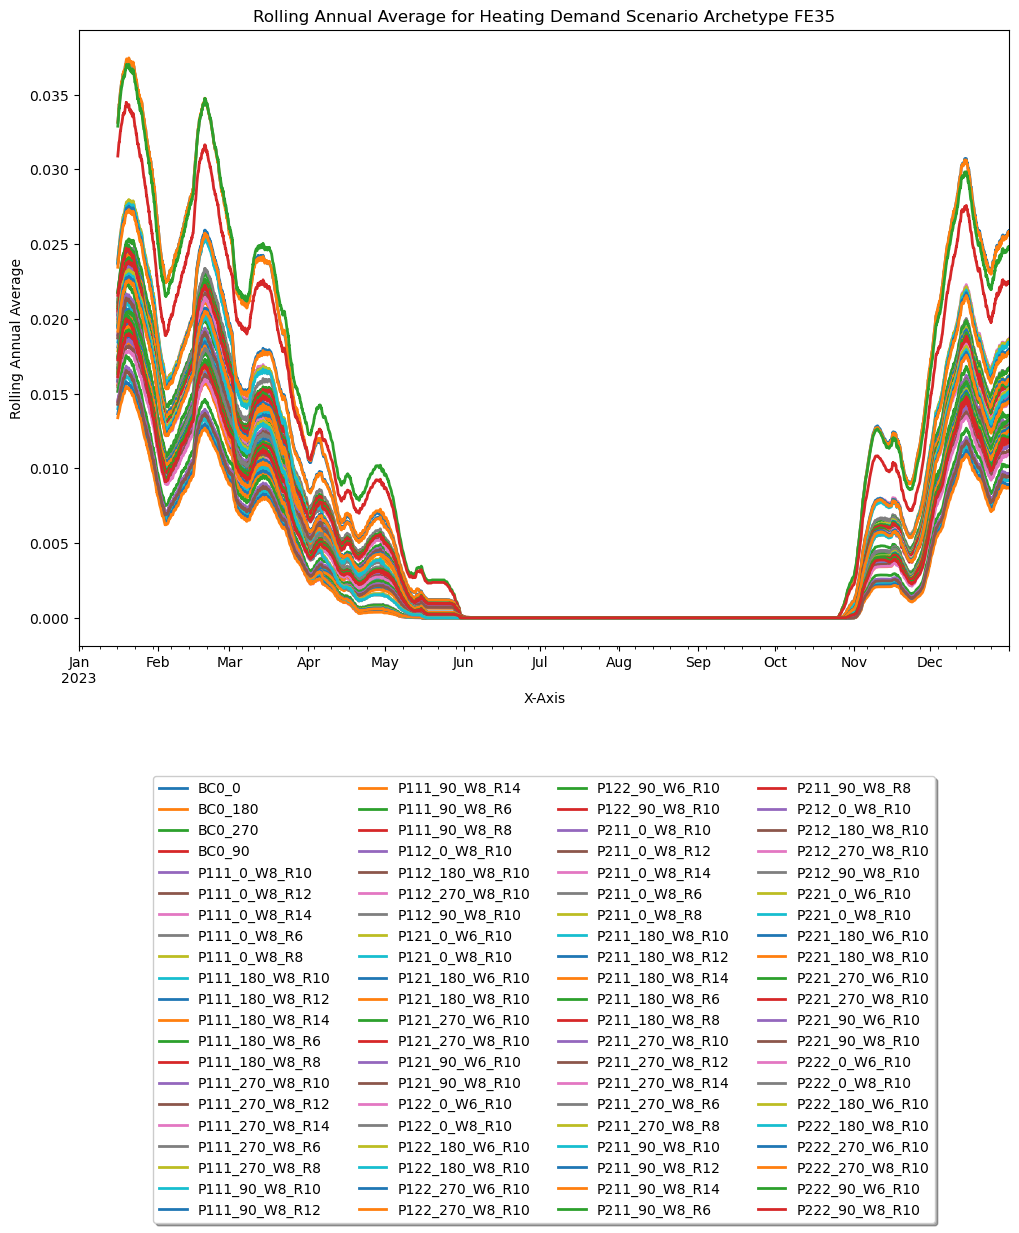

In [8]:
# plot all simulations
window_size = 365  # Set the window size to 365 for rolling annual average


rolling_avg = heating_demand.rolling(window=window_size).mean()


plt.figure(figsize=(12, 8))  # Adjust the figsize as needed


for column in rolling_avg.columns:
    rolling_avg[column].plot(label=column, linewidth=2)

plt.xlabel("X-Axis")
plt.ylabel("Rolling Annual Average")
plt.title("Rolling Annual Average for Heating Demand Scenario Archetype FE35")

# Place the legend under the graph
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=4)

plt.show()